<a href="https://colab.research.google.com/github/sangbum-parkpark/ai02-project1/blob/main/AI_02_%EB%B0%95%EC%83%81%EB%B2%94_Section1%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = '/content/drive/MyDrive/AI부트캠프/vgames2.csv'
df = pd.read_csv(filename)
# 불필요하다 판단된 Unnamed, 열을 제거. 
df = df.drop(['Unnamed: 0'], axis = 1)
#df.head()

In [4]:
# 판매량에 포함된 문자'M' 제거
# 기존에 Sales 데이터의 단위가 'M'이기 때문이다.
df["NA_Sales"] = df["NA_Sales"].str.replace(pat=r'M', repl=r'', regex=True)
df["EU_Sales"] = df["EU_Sales"].str.replace(pat=r'M', repl=r'', regex=True)
df["JP_Sales"] = df["JP_Sales"].str.replace(pat=r'M', repl=r'', regex=True)
df["Other_Sales"] = df["Other_Sales"].str.replace(pat=r'M', repl=r'', regex=True)
#df.head(11)

In [5]:
# 판매량에 포함된 문자'K'를 *0.001로 대체해 단위를 'M'으로 통일했다.
df['NA_Sales'] = df['NA_Sales'].apply(lambda x: int(x.split('K')[0])*0.001 if len(x.split('K')) > 1 else x)
df['EU_Sales'] = df['EU_Sales'].apply(lambda x: int(x.split('K')[0])*0.001 if len(x.split('K')) > 1 else x)
df['JP_Sales'] = df['JP_Sales'].apply(lambda x: int(x.split('K')[0])*0.001 if len(x.split('K')) > 1 else x)
df['Other_Sales'] = df['Other_Sales'].apply(lambda x: int(x.split('K')[0])*0.001 if len(x.split('K')) > 1 else x)
#df.head(11)

In [6]:
# Year 컬럼의 0~20으로 표현되는 연도 데이터들을 2000대로 변환
df.loc[(df.Year < 20),'Year'] = df['Year'] + 2000
# Year 컬럼의 두자리수로 표현되는 1900년대 연도 데이터들을 1900대로 변환
df.loc[(df.Year < 100), 'Year'] = df['Year'] + 1900

df.loc[(df.Year == 'float'),'Year'] = 'string'

In [7]:
# Sales 컬럼들의 데이터타입을 'float'으로 변경했다.
df = df.astype({'NA_Sales':'float',
                'EU_Sales':'float',
                'JP_Sales':'float',
                'Other_Sales':'float'})
df.dtypes

Name            object
Platform        object
Year            object
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [8]:
df['Sales_total'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
#df.head()

반드시 들어가야 하는 내용
1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스


**1. 지역에 따라서 선호하는 게임 장르가 다를까**

In [9]:
# 지역에 따라서 선호하는 게임 장르가 다를까 에 대해 알아보기 위해서
# 지역별 판매량, 장르를 제외한 컬럼들을 drop한다.

df10 = df.drop(['Name', 'Platform', 'Year', 'Publisher'], axis = 1)

In [10]:
# groupby함수를 이용해 장르별 판매량을 알아보았다.

group_genre = df10.groupby(df10['Genre'])
genre_sales = group_genre.sum()
region = genre_sales.T
region
# 2sampe chi-square test를 통해 지역과 장르 두 변수가 서로 독립인지 검정하려한다.

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,874.81,105.66,223.20,408.05,446.44,123.35,357.19,319.54,581.92,182.96,680.52,68.70
EU_Sales,522.16,64.05,101.22,212.36,201.61,50.73,237.10,183.58,313.05,113.35,376.48,45.32
JP_Sales,157.90,51.95,87.34,105.27,130.65,56.87,56.40,344.95,38.28,63.70,135.37,49.46
Other_Sales,186.45,16.81,36.64,74.04,51.53,12.52,77.10,56.96,102.65,31.48,134.67,11.36
Sales_total,1741.32,238.47,448.40,799.72,830.23,243.47,727.79,905.03,1035.90,391.49,1327.04,174.84


- H0 = 지역별 판매량과 장르는 관련성이 없다.
- H1 = 지역별 판매량과 장르는 관련성이 있다. 

In [11]:
from scipy.stats import chi2_contingency
chi2_contingency(observed = region)

# P-value가 유의수준보다 현저히 낮으므로 H0는 기각, H1이 채택

(696.7959761665388,
 2.4821948321842943e-118,
 44,
 array([[ 858.96895075,  117.63393614,  221.18948701,  394.49075948,
          409.54091837,  120.10036664,  359.00869034,  446.43871862,
          510.99507046,  193.11657509,  654.61038546,   86.24614163],
        [ 475.6200157 ,   65.13513033,  122.47491273,  218.43362447,
          226.76705352,   66.50081847,  198.78683483,  247.19774815,
          282.94326963,  106.93065028,  362.46455886,   47.75538301],
        [ 251.09725564,   34.38722495,   64.65899974,  115.31912416,
          119.71864709,   35.10822183,  104.94686312,  130.50476034,
          149.37613254,   56.45261331,  191.35833857,   25.21181872],
        [ 155.6337779 ,   21.31370858,   40.07660052,   71.47649189,
           74.20338101,   21.76059306,   65.04761171,   80.88877289,
           92.58552738,   34.99016132,  118.6067171 ,   15.62665663],
        [1741.32      ,  238.47      ,  448.4       ,  799.72      ,
          830.23      ,  243.47      ,  727.79  

In [12]:
#region.reset_index().melt(id_vars=["index"])
#region = region.reset_index()
genre_sales = genre_sales.reset_index()

In [13]:
genre_sales

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_total
0,Action,874.81,522.16,157.90,186.45,1741.32
1,Adventure,105.66,64.05,51.95,16.81,238.47
2,Fighting,223.20,101.22,87.34,36.64,448.40
3,Misc,408.05,212.36,105.27,74.04,799.72
4,Platform,446.44,201.61,130.65,51.53,830.23
5,Puzzle,123.35,50.73,56.87,12.52,243.47
6,Racing,357.19,237.10,56.40,77.10,727.79
7,Role-Playing,319.54,183.58,344.95,56.96,905.03
8,Shooter,581.92,313.05,38.28,102.65,1035.90
9,Simulation,182.96,113.35,63.70,31.48,391.49


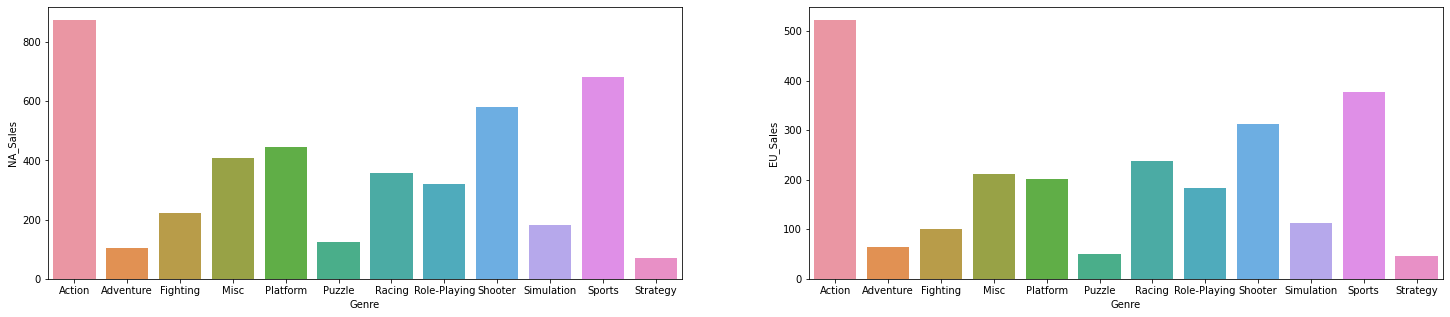

In [14]:
# 지역별 판매량과 장르는 관련성이 있다는 가설을 전제로
# 지역별로 장르별 판매량을 시각화한다.
# 각 지역에서 장르별 판매량의 비율을 확인하기 위한 과정이기 때문에 한 차트에 표현하지 않았으며, Y축의 단위를 통일하지 않았다.
import seaborn as sns
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(25,5))

sns.barplot(ax = axes[0], x = "Genre", y = "NA_Sales", data = genre_sales)
sns.barplot(ax = axes[1], x = "Genre", y = "EU_Sales", data = genre_sales);

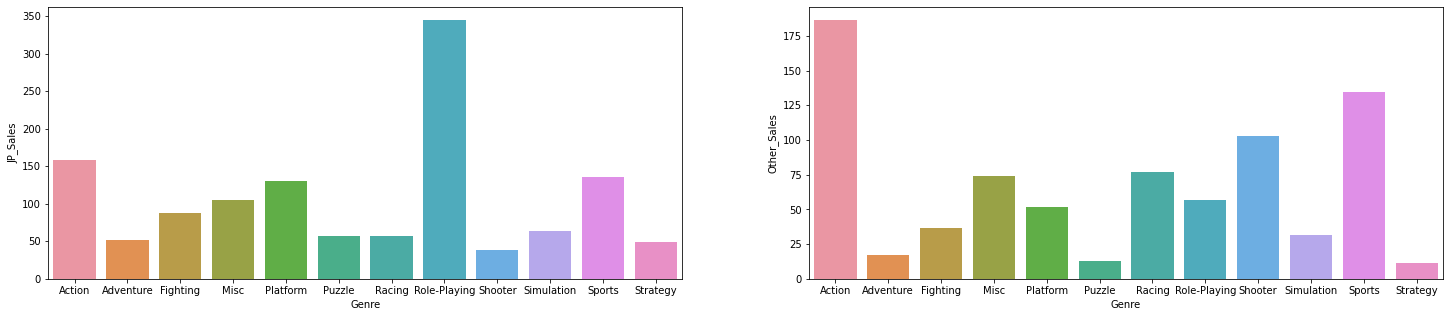

In [15]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(25, 5))

sns.barplot(ax = axes[0], x = "Genre", y = "JP_Sales", data = genre_sales)
sns.barplot(ax = axes[1], x = "Genre", y = "Other_Sales", data = genre_sales);

- 북미, 유럽, 기타 지역 판매량에서 Action 장르가 두드러지게 나타나는 반면

- 일본 지역 판매량에서는 다른 지역들보다 Action 장르가 상대적으로 약하고,  Role-Playing 장르가 두드러진다.

**2. 연도별 게임의 트렌드**


0000년도에 출시된 게임들은 어떤 장르, 어떤 플랫폼이 많았는가를 물어보는 것일까?



In [16]:
# Sales 값이 온전하다면 Year 데이터에 결측치가 있어도 활용가능하다
# 그러나 판매량에 결측치가 있다면 해당 데이터는 활용하는데 의미가 없다.
# 우리는 전체 시장의 판매량을 기준으로 게임을 설계하는 것이기 때문에
# 연도별 게임의 트렌드가 있는지 알아보기 위한 데이터는
# 전체 지역 판매량의 총계를 이용한다.

# 그리고 1번 문항에서 우리는 일본 시장의 장르 선호도가 다른 지역들과는 차이가 있다는 것을 알았다.
# 따라서 일본 시장의 게임 트렌드에 대해서도 따로 알아본다.

In [17]:
# 연도별 게임산업 전체 판매량

#df['Sales_total'].groupby(df['Year']).sum()

# 규모가 급격히 확대된 1996년부터의 데이터부터 활용한다.
# 1996년 이전의 데이터는 상대적으로 긴 기간동안 
# 누적된 데이터 임에도 불구하고 낮은 판매량 수치를 보이기 때문이다.
# 추가적으로 2018, 2019년의 데이터가 존재하지 않는다는 것을 알 수 있다.

In [18]:
df = df.astype({'Year':'float'})

In [19]:
df_after1995 = df.loc[df.Year > 1995]

In [20]:
# 연도별 
#df_after1995['Sales_total'].groupby(df_after1995['Genre']).size()

In [21]:
# 연도별 Platform, Genre, Sales_total 데이터 정리...
# 반목문을 이용해서 정리할 수 있다면 정말 좋은텐데...

df_1996 = df.loc[(df.Year == 1996)]
df_1996 = df_1996[['Platform', 'Genre', 'Sales_total']]
#
df_1997 = df.loc[(df.Year == 1997)]
df_1997 = df_1997[['Platform', 'Genre', 'Sales_total']]
#
df_1998 = df.loc[(df.Year == 1998)]
df_1998 = df_1998[['Platform', 'Genre', 'Sales_total']]
#
df_1999 = df.loc[(df.Year == 1999)]
df_1999 = df_1999[['Platform', 'Genre', 'Sales_total']]
#
df_2000 = df.loc[(df.Year == 2000)]
df_2000 = df_2000[['Platform', 'Genre', 'Sales_total']]
#
df_2001 = df.loc[(df.Year == 2001)]
df_2001 = df_2001[['Platform', 'Genre', 'Sales_total']]
#
df_2002 = df.loc[(df.Year == 2002)]
df_2002 = df_2002[['Platform', 'Genre', 'Sales_total']]
#
df_2003 = df.loc[(df.Year == 2003)]
df_2003 = df_2003[['Platform', 'Genre', 'Sales_total']]
#
df_2004 = df.loc[(df.Year == 2004)]
df_2004 = df_2004[['Platform', 'Genre', 'Sales_total']]
#
df_2005 = df.loc[(df.Year == 2005)]
df_2005 = df_2005[['Platform', 'Genre', 'Sales_total']]
#
df_2006 = df.loc[(df.Year == 2006)]
df_2006 = df_2006[['Platform', 'Genre', 'Sales_total']]
#
df_2007 = df.loc[(df.Year == 2007)]
df_2007 = df_2007[['Platform', 'Genre', 'Sales_total']]
#
df_2008 = df.loc[(df.Year == 2008)]
df_2008 = df_2008[['Platform', 'Genre', 'Sales_total']]
#
df_2009 = df.loc[(df.Year == 2009)]
df_2009 = df_2008[['Platform', 'Genre', 'Sales_total']]
#
df_2010 = df.loc[(df.Year == 2010)]
df_2010 = df_2010[['Platform', 'Genre', 'Sales_total']]
#
df_2011 = df.loc[(df.Year == 2011)]
df_2011 = df_2011[['Platform', 'Genre', 'Sales_total']]
#
df_2012 = df.loc[(df.Year == 2012)]
df_2012 = df_2012[['Platform', 'Genre', 'Sales_total']]
#
df_2013 = df.loc[(df.Year == 2013)]
df_2013 = df_2013[['Platform', 'Genre', 'Sales_total']]
#
df_2014 = df.loc[(df.Year == 2014)]
df_2014 = df_2014[['Platform', 'Genre', 'Sales_total']]
#
df_2015 = df.loc[(df.Year == 2015)]
df_2015 = df_2015[['Platform', 'Genre', 'Sales_total']]
#
df_2016 = df.loc[(df.Year == 2016)]
df_2016 = df_2016[['Platform', 'Genre', 'Sales_total']]
#
df_2017 = df.loc[(df.Year == 2017)]
df_2017 = df_2017[['Platform', 'Genre', 'Sales_total']]
#
df_2018 = df.loc[(df.Year == 2018)]
df_2018 = df_2018[['Platform', 'Genre', 'Sales_total']]
#
df_2019 = df.loc[(df.Year == 2019)]
df_2019 = df_2019[['Platform', 'Genre', 'Sales_total']]
#
df_2020 = df.loc[(df.Year == 2020)]
df_2020 = df_2020[['Platform', 'Genre', 'Sales_total']]
#

In [22]:
grouped = df_1996['Sales_total'].groupby(df_1996['Platform'])
pd.DataFrame(grouped.size())

,Sales_total
Platform,
GB,6
N64,18
NG,2
PC,4
PCFX,1
PS,164
SAT,38
SNES,30


In [23]:
### platform_popular_0000 = 해당년도에 어떤 플랫폼을 기반으로한 게임이 많이 출시되었는지.
### platform_0000 = 해당년도에 발매된 게임들 중 어떤 플랫폼을 기반으로 한 게임들이 누적 판매량이 높은지.
### Top3_platform_0000 = 해당년도에 발매된 게임들 중 누적 판매량이 높은 플랫폼 상위 3종류 

### genre_popular_0000  = 해당년도에 어떤 장르의 게임이 많이 출시되었는지.
### genre_0000 = 해당년도에 발매된 게임들 중 어떤 장르의 게임들이 누적 판매량이 높은지.
### Top3_Genre_0000 = 해당년도에 발매된 게임들 중 누적 판매량이 높은 장르 상위 3종류

### 1996년
grouped = df_1996['Sales_total'].groupby(df_1996['Platform'])
platform_popular_1996 = pd.DataFrame(grouped.size())
platform_popular_1996 = platform_popular_1996.reset_index()
platform_popular_1996 = platform_popular_1996.sort_values(by='Sales_total' ,ascending=False)
platform_1996 = pd.DataFrame(grouped.sum())
platform_1996 = platform_1996.reset_index()
platform_1996 = platform_1996.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_1996 = platform_1996.head(3)['Platform']

grouped_genre = df_1996['Sales_total'].groupby(df_1996['Genre'])
genre_popular_1996 = pd.DataFrame(group_genre.size())
genre_popular_1996 = genre_popular_1996.reset_index()
genre_popular_1996 = genre_popular_1996.sort_values(by=0, ascending=False)
genre_1996 = pd.DataFrame(grouped_genre.sum())
genre_1996 = genre_1996.reset_index()
genre_1996 = genre_1996.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_1996 = genre_1996.head(3)['Genre']

### 1997년
grouped = df_1997['Sales_total'].groupby(df_1997['Platform'])
platform_popular_1997 = pd.DataFrame(grouped.size())
platform_popular_1997 = platform_popular_1997.reset_index()
platform_popular_1997 = platform_popular_1997.sort_values(by='Sales_total' ,ascending=False)
platform_1997 = pd.DataFrame(grouped.sum())
platform_1997 = platform_1997.reset_index()
platform_1997 = platform_1997.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_1997 = platform_1997.head(3)['Platform']

grouped_genre = df_1997['Sales_total'].groupby(df_1997['Genre'])
genre_popular_1997 = pd.DataFrame(group_genre.size())
genre_popular_1997 = genre_popular_1997.reset_index()
genre_popular_1997 = genre_popular_1997.sort_values(by=0, ascending=False)
genre_1997 = pd.DataFrame(grouped_genre.sum())
genre_1997 = genre_1997.reset_index()
genre_1997 = genre_1997.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_1997 = genre_1997.head(3)['Genre']

### 1998년
grouped = df_1998['Sales_total'].groupby(df_1998['Platform'])
platform_popular_1998 = pd.DataFrame(grouped.size())
platform_popular_1998 = platform_popular_1998.reset_index()
platform_popular_1998 = platform_popular_1998.sort_values(by='Sales_total' ,ascending=False)
platform_1998 = pd.DataFrame(grouped.sum())
platform_1998 = platform_1998.reset_index()
platform_1998 = platform_1998.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_1998 = platform_1998.head(3)['Platform']

grouped_genre = df_1998['Sales_total'].groupby(df_1998['Genre'])
genre_popular_1998 = pd.DataFrame(group_genre.size())
genre_popular_1998 = genre_popular_1998.reset_index()
genre_popular_1998 = genre_popular_1998.sort_values(by=0, ascending=False)
genre_1998 = pd.DataFrame(grouped_genre.sum())
genre_1998 = genre_1998.reset_index()
genre_1998 = genre_1998.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_1998 = genre_1998.head(3)['Genre']

### 1999년
grouped = df_1999['Sales_total'].groupby(df_1999['Platform'])
platform_popular_1999 = pd.DataFrame(grouped.size())
platform_popular_1999 = platform_popular_1999.reset_index()
platform_popular_1999 = platform_popular_1999.sort_values(by='Sales_total' ,ascending=False)
platform_1999 = pd.DataFrame(grouped.sum())
platform_1999 = platform_1999.reset_index()
platform_1999 = platform_1999.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_1999 = platform_1999.head(3)['Platform']

grouped_genre = df_1999['Sales_total'].groupby(df_1999['Genre'])
genre_popular_1999 = pd.DataFrame(group_genre.size())
genre_popular_1999 = genre_popular_1999.reset_index()
genre_popular_1999 = genre_popular_1999.sort_values(by=0, ascending=False)
genre_1999 = pd.DataFrame(grouped_genre.sum())
genre_1999 = genre_1999.reset_index()
genre_1999 = genre_1999.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_1999 = genre_1999.head(3)['Genre']

### 2000년
grouped = df_2000['Sales_total'].groupby(df_2000['Platform'])
platform_popular_2000 = pd.DataFrame(grouped.size())
platform_popular_2000 = platform_popular_2000.reset_index()
platform_popular_2000 = platform_popular_2000.sort_values(by='Sales_total' ,ascending=False)
platform_2000 = pd.DataFrame(grouped.sum())
platform_2000 = platform_2000.reset_index()
platform_2000 = platform_2000.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2000 = platform_2000.head(3)['Platform']

grouped_genre = df_2000['Sales_total'].groupby(df_2000['Genre'])
genre_popular_2000 = pd.DataFrame(group_genre.size())
genre_popular_2000 = genre_popular_2000.reset_index()
genre_popular_2000 = genre_popular_2000.sort_values(by=0, ascending=False)
genre_2000 = pd.DataFrame(grouped_genre.sum())
genre_2000 = genre_2000.reset_index()
genre_2000 = genre_2000.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2000 = genre_2000.head(3)['Genre']

### 2001년
grouped = df_2001['Sales_total'].groupby(df_2001['Platform'])
platform_popular_2001 = pd.DataFrame(grouped.size())
platform_popular_2001 = platform_popular_2001.reset_index()
platform_popular_2001 = platform_popular_2001.sort_values(by='Sales_total' ,ascending=False)
platform_2001 = pd.DataFrame(grouped.sum())
platform_2001 = platform_2001.reset_index()
platform_2001 = platform_2001.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2001 = platform_2001.head(3)['Platform']

grouped_genre = df_2001['Sales_total'].groupby(df_2001['Genre'])
genre_popular_2001 = pd.DataFrame(group_genre.size())
genre_popular_2001 = genre_popular_2001.reset_index()
genre_popular_2001 = genre_popular_2001.sort_values(by=0, ascending=False)
genre_2001 = pd.DataFrame(grouped_genre.sum())
genre_2001 = genre_2001.reset_index()
genre_2001 = genre_2001.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2001 = genre_2001.head(3)['Genre']

### 2002년
grouped = df_2002['Sales_total'].groupby(df_2002['Platform'])
platform_popular_2002 = pd.DataFrame(grouped.size())
platform_popular_2002 = platform_popular_2002.reset_index()
platform_popular_2002 = platform_popular_2002.sort_values(by='Sales_total' ,ascending=False)
platform_2002 = pd.DataFrame(grouped.sum())
platform_2002 = platform_2002.reset_index()
platform_2002 = platform_2002.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2002 = platform_2002.head(3)['Platform']

grouped_genre = df_2002['Sales_total'].groupby(df_2002['Genre'])
genre_popular_2002 = pd.DataFrame(group_genre.size())
genre_popular_2002 = genre_popular_2002.reset_index()
genre_popular_2002 = genre_popular_2002.sort_values(by=0, ascending=False)
genre_2002 = pd.DataFrame(grouped_genre.sum())
genre_2002 = genre_2002.reset_index()
genre_2002 = genre_2002.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2002 = genre_2002.head(3)['Genre']

### 2003년
grouped = df_2003['Sales_total'].groupby(df_2003['Platform'])
platform_popular_2003 = pd.DataFrame(grouped.size())
platform_popular_2003 = platform_popular_2003.reset_index()
platform_popular_2003 = platform_popular_2003.sort_values(by='Sales_total' ,ascending=False)
platform_2003 = pd.DataFrame(grouped.sum())
platform_2003 = platform_2003.reset_index()
platform_2003 = platform_2003.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2003 = platform_2003.head(3)['Platform']

grouped_genre = df_2003['Sales_total'].groupby(df_2003['Genre'])
genre_popular_2003 = pd.DataFrame(group_genre.size())
genre_popular_2003 = genre_popular_2003.reset_index()
genre_popular_2003 = genre_popular_2003.sort_values(by=0, ascending=False)
genre_2003 = pd.DataFrame(grouped_genre.sum())
genre_2003 = genre_2003.reset_index()
genre_2003 = genre_2003.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2003 = genre_2003.head(3)['Genre']

### 2004년
grouped = df_2004['Sales_total'].groupby(df_2004['Platform'])
platform_popular_2004 = pd.DataFrame(grouped.size())
platform_popular_2004 = platform_popular_2004.reset_index()
platform_popular_2004 = platform_popular_2004.sort_values(by='Sales_total' ,ascending=False)
platform_2004 = pd.DataFrame(grouped.sum())
platform_2004 = platform_2004.reset_index()
platform_2004 = platform_2004.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2004 = platform_2004.head(3)['Platform']

grouped_genre = df_2004['Sales_total'].groupby(df_2004['Genre'])
genre_popular_2004 = pd.DataFrame(group_genre.size())
genre_popular_2004 = genre_popular_2004.reset_index()
genre_popular_2004 = genre_popular_2004.sort_values(by=0, ascending=False)
genre_2004 = pd.DataFrame(grouped_genre.sum())
genre_2004 = genre_2004.reset_index()
genre_2004 = genre_2004.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2004 = genre_2004.head(3)['Genre']

### 2005년
grouped = df_2005['Sales_total'].groupby(df_2005['Platform'])
platform_popular_2005 = pd.DataFrame(grouped.size())
platform_popular_2005 = platform_popular_2005.reset_index()
platform_popular_2005 = platform_popular_2005.sort_values(by='Sales_total' ,ascending=False)
platform_2005 = pd.DataFrame(grouped.sum())
platform_2005 = platform_2005.reset_index()
platform_2005 = platform_2005.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2005 = platform_1996.head(3)['Platform']

grouped_genre = df_2005['Sales_total'].groupby(df_2005['Genre'])
genre_popular_2005 = pd.DataFrame(group_genre.size())
genre_popular_2005 = genre_popular_2005.reset_index()
genre_popular_2005 = genre_popular_2005.sort_values(by=0, ascending=False)
genre_2005 = pd.DataFrame(grouped_genre.sum())
genre_2005 = genre_2005.reset_index()
genre_2005 = genre_2005.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2005 = genre_2005.head(3)['Genre']

### 2006년
grouped = df_2006['Sales_total'].groupby(df_2006['Platform'])
platform_popular_2006 = pd.DataFrame(grouped.size())
platform_popular_2006 = platform_popular_2006.reset_index()
platform_popular_2006 = platform_popular_2006.sort_values(by='Sales_total' ,ascending=False)
platform_2006 = pd.DataFrame(grouped.sum())
platform_2006 = platform_2006.reset_index()
platform_2006 = platform_2006.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2006 = platform_1996.head(3)['Platform']

grouped_genre = df_2006['Sales_total'].groupby(df_2006['Genre'])
genre_popular_2006 = pd.DataFrame(group_genre.size())
genre_popular_2006 = genre_popular_2006.reset_index()
genre_popular_2006 = genre_popular_2006.sort_values(by=0, ascending=False)
genre_2006 = pd.DataFrame(grouped_genre.sum())
genre_2006 = genre_2006.reset_index()
genre_2006 = genre_2006.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2006 = genre_2006.head(3)['Genre']

### 2007년
grouped = df_2007['Sales_total'].groupby(df_2007['Platform'])
platform_popular_2007 = pd.DataFrame(grouped.size())
platform_popular_2007 = platform_popular_2007.reset_index()
platform_popular_2007 = platform_popular_2007.sort_values(by='Sales_total' ,ascending=False)
platform_2007 = pd.DataFrame(grouped.sum())
platform_2007 = platform_2007.reset_index()
platform_2007 = platform_2007.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2007 = platform_1996.head(3)['Platform']

grouped_genre = df_2007['Sales_total'].groupby(df_2007['Genre'])
genre_popular_2007 = pd.DataFrame(group_genre.size())
genre_popular_2007 = genre_popular_2007.reset_index()
genre_popular_2007 = genre_popular_2007.sort_values(by=0, ascending=False)
genre_2007 = pd.DataFrame(grouped_genre.sum())
genre_2007 = genre_2007.reset_index()
genre_2007 = genre_2007.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2007 = genre_2007.head(3)['Genre']

### 2008년
grouped = df_2008['Sales_total'].groupby(df_2008['Platform'])
platform_popular_2008 = pd.DataFrame(grouped.size())
platform_popular_2008 = platform_popular_2008.reset_index()
platform_popular_2008 = platform_popular_2008.sort_values(by='Sales_total' ,ascending=False)
platform_2008 = pd.DataFrame(grouped.sum())
platform_2008 = platform_2008.reset_index()
platform_2008 = platform_2008.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2008 = platform_1996.head(3)['Platform']

grouped_genre = df_2008['Sales_total'].groupby(df_2008['Genre'])
genre_popular_2008 = pd.DataFrame(group_genre.size())
genre_popular_2008 = genre_popular_2008.reset_index()
genre_popular_2008 = genre_popular_2008.sort_values(by=0, ascending=False)
genre_2008 = pd.DataFrame(grouped_genre.sum())
genre_2008 = genre_2008.reset_index()
genre_2008 = genre_2008.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2008 = genre_2008.head(3)['Genre']

### 2009년
grouped = df_2009['Sales_total'].groupby(df_2009['Platform'])
platform_popular_2009 = pd.DataFrame(grouped.size())
platform_popular_2009 = platform_popular_2009.reset_index()
platform_popular_2009 = platform_popular_2009.sort_values(by='Sales_total' ,ascending=False)
platform_2009 = pd.DataFrame(grouped.sum())
platform_2009 = platform_2009.reset_index()
platform_2009 = platform_2009.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2009 = platform_1996.head(3)['Platform']

grouped_genre = df_2009['Sales_total'].groupby(df_2009['Genre'])
genre_popular_2009 = pd.DataFrame(group_genre.size())
genre_popular_2009 = genre_popular_2009.reset_index()
genre_popular_2009 = genre_popular_2009.sort_values(by=0, ascending=False)
genre_2009 = pd.DataFrame(grouped_genre.sum())
genre_2009 = genre_2009.reset_index()
genre_2009 = genre_2009.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2009 = genre_2009.head(3)['Genre']

### 2010년
grouped = df_2010['Sales_total'].groupby(df_2010['Platform'])
platform_popular_2010 = pd.DataFrame(grouped.size())
platform_popular_2010 = platform_popular_2010.reset_index()
platform_popular_2010 = platform_popular_2010.sort_values(by='Sales_total' ,ascending=False)
platform_2010 = pd.DataFrame(grouped.sum())
platform_2010 = platform_2010.reset_index()
platform_2010 = platform_2010.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2010 = platform_1996.head(3)['Platform']

grouped_genre = df_2010['Sales_total'].groupby(df_2010['Genre'])
genre_popular_2010 = pd.DataFrame(group_genre.size())
genre_popular_2010 = genre_popular_2010.reset_index()
genre_popular_2010 = genre_popular_2010.sort_values(by=0, ascending=False)
genre_2010 = pd.DataFrame(grouped_genre.sum())
genre_2010 = genre_2010.reset_index()
genre_2010 = genre_2010.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2010 = genre_2010.head(3)['Genre']

### 2011년
grouped = df_2011['Sales_total'].groupby(df_2011['Platform'])
platform_popular_2011 = pd.DataFrame(grouped.size())
platform_popular_2011 = platform_popular_2011.reset_index()
platform_popular_2011 = platform_popular_2011.sort_values(by='Sales_total' ,ascending=False)
platform_2011 = pd.DataFrame(grouped.sum())
platform_2011 = platform_2011.reset_index()
platform_2011 = platform_2011.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2011 = platform_1996.head(3)['Platform']

grouped_genre = df_2011['Sales_total'].groupby(df_2011['Genre'])
genre_popular_2011 = pd.DataFrame(group_genre.size())
genre_popular_2011 = genre_popular_2011.reset_index()
genre_popular_2011 = genre_popular_2011.sort_values(by=0, ascending=False)
genre_2011 = pd.DataFrame(grouped_genre.sum())
genre_2011 = genre_2011.reset_index()
genre_2011 = genre_2011.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2011 = genre_2011.head(3)['Genre']

### 2012년
grouped = df_2012['Sales_total'].groupby(df_2012['Platform'])
platform_popular_2012 = pd.DataFrame(grouped.size())
platform_popular_2012 = platform_popular_2012.reset_index()
platform_popular_2012 = platform_popular_2012.sort_values(by='Sales_total' ,ascending=False)
platform_2012 = pd.DataFrame(grouped.sum())
platform_2012 = platform_2012.reset_index()
platform_2012 = platform_2012.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2012 = platform_2012.head(3)['Platform']

grouped_genre = df_2012['Sales_total'].groupby(df_2012['Genre'])
genre_popular_2012 = pd.DataFrame(group_genre.size())
genre_popular_2012 = genre_popular_2012.reset_index()
genre_popular_2012 = genre_popular_2012.sort_values(by=0, ascending=False)
genre_2012 = pd.DataFrame(grouped_genre.sum())
genre_2012 = genre_2012.reset_index()
genre_2012 = genre_2012.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2012 = genre_2012.head(3)['Genre']

### 2013년
grouped = df_2013['Sales_total'].groupby(df_2013['Platform'])
platform_popular_2013 = pd.DataFrame(grouped.size())
platform_popular_2013 = platform_popular_2013.reset_index()
platform_popular_2013 = platform_popular_2013.sort_values(by='Sales_total' ,ascending=False)
platform_2013 = pd.DataFrame(grouped.sum())
platform_2013 = platform_2013.reset_index()
platform_2013 = platform_2013.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2013 = platform_2013.head(3)['Platform']

grouped_genre = df_2013['Sales_total'].groupby(df_2013['Genre'])
genre_popular_2013 = pd.DataFrame(group_genre.size())
genre_popular_2013 = genre_popular_2013.reset_index()
genre_popular_2013 = genre_popular_2013.sort_values(by=0, ascending=False)
genre_2013 = pd.DataFrame(grouped_genre.sum())
genre_2013 = genre_2013.reset_index()
genre_2013 = genre_2013.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2013 = genre_2013.head(3)['Genre']

### 2014년
grouped = df_2014['Sales_total'].groupby(df_2014['Platform'])
platform_popular_2014 = pd.DataFrame(grouped.size())
platform_popular_2014 = platform_popular_2014.reset_index()
platform_popular_2014 = platform_popular_2014.sort_values(by='Sales_total' ,ascending=False)
platform_2014 = pd.DataFrame(grouped.sum())
platform_2014 = platform_2014.reset_index()
platform_2014 = platform_2014.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2014 = platform_2014.head(3)['Platform']

grouped_genre = df_2014['Sales_total'].groupby(df_2014['Genre'])
genre_popular_2014 = pd.DataFrame(group_genre.size())
genre_popular_2014 = genre_popular_2014.reset_index()
genre_popular_2014 = genre_popular_2014.sort_values(by=0, ascending=False)
genre_2014 = pd.DataFrame(grouped_genre.sum())
genre_2014 = genre_2014.reset_index()
genre_2014 = genre_2014.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2014 = genre_2014.head(3)['Genre']

### 2015년
grouped = df_2015['Sales_total'].groupby(df_2015['Platform'])
platform_popular_2015 = pd.DataFrame(grouped.size())
platform_popular_2015 = platform_popular_2015.reset_index()
platform_popular_2015 = platform_popular_2015.sort_values(by='Sales_total' ,ascending=False)
platform_2015 = pd.DataFrame(grouped.sum())
platform_2015 = platform_2015.reset_index()
platform_2015 = platform_2015.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2015 = platform_2015.head(3)['Platform']

grouped_genre = df_2015['Sales_total'].groupby(df_2015['Genre'])
genre_popular_2015 = pd.DataFrame(group_genre.size())
genre_popular_2015 = genre_popular_2015.reset_index()
genre_popular_2015 = genre_popular_2015.sort_values(by=0, ascending=False)
genre_2015 = pd.DataFrame(grouped_genre.sum())
genre_2015 = genre_2015.reset_index()
genre_2015 = genre_2015.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2015 = genre_2015.head(3)['Genre']

### 2016년
grouped = df_2016['Sales_total'].groupby(df_2016['Platform'])
platform_popular_2016 = pd.DataFrame(grouped.size())
platform_popular_2016 = platform_popular_2016.reset_index()
platform_popular_2016 = platform_popular_2016.sort_values(by='Sales_total' ,ascending=False)
platform_2016 = pd.DataFrame(grouped.sum())
platform_2016 = platform_2016.reset_index()
platform_2016 = platform_2016.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2016 = platform_2016.head(3)['Platform']

grouped_genre = df_2016['Sales_total'].groupby(df_2016['Genre'])
genre_popular_2016 = pd.DataFrame(group_genre.size())
genre_popular_2016 = genre_popular_2016.reset_index()
genre_popular_2016 = genre_popular_2016.sort_values(by=0, ascending=False)
genre_2016 = pd.DataFrame(grouped_genre.sum())
genre_2016 = genre_2016.reset_index()
genre_2016 = genre_2016.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2016 = genre_2016.head(3)['Genre']

### 2017년
grouped = df_2017['Sales_total'].groupby(df_2017['Platform'])
platform_popular_2017 = pd.DataFrame(grouped.size())
platform_popular_2017 = platform_popular_2017.reset_index()
platform_popular_2017 = platform_popular_2017.sort_values(by='Sales_total' ,ascending=False)
platform_2017 = pd.DataFrame(grouped.sum())
platform_2017 = platform_2017.reset_index()
platform_2017 = platform_2017.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2017 = platform_2017.head(3)['Platform']

grouped_genre = df_2017['Sales_total'].groupby(df_2017['Genre'])
genre_popular_2017 = pd.DataFrame(group_genre.size())
genre_popular_2017 = genre_popular_2017.reset_index()
genre_popular_2017 = genre_popular_2017.sort_values(by=0, ascending=False)
genre_2017 = pd.DataFrame(grouped_genre.sum())
genre_2017 = genre_2017.reset_index()
genre_2017 = genre_2017.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2017 = genre_2017.head(3)['Genre']

### 2018년
grouped = df_2018['Sales_total'].groupby(df_2018['Platform'])
platform_popular_2018 = pd.DataFrame(grouped.size())
platform_popular_2018 = platform_popular_2018.reset_index()
platform_popular_2018 = platform_popular_2018.sort_values(by='Sales_total' ,ascending=False)
platform_2018 = pd.DataFrame(grouped.sum())
platform_2018 = platform_2018.reset_index()
platform_2018 = platform_2018.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2018 = platform_2018.head(3)['Platform']

grouped_genre = df_2018['Sales_total'].groupby(df_2018['Genre'])
genre_popular_2018 = pd.DataFrame(group_genre.size())
genre_popular_2018 = genre_popular_2018.reset_index()
genre_popular_2018 = genre_popular_2018.sort_values(by=0, ascending=False)
genre_2018 = pd.DataFrame(grouped_genre.sum())
genre_2018 = genre_2018.reset_index()
genre_2018 = genre_2018.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2018 = genre_2018.head(3)['Genre']

### 2019년
grouped = df_2019['Sales_total'].groupby(df_2019['Platform'])
platform_popular_2019 = pd.DataFrame(grouped.size())
platform_popular_2019 = platform_popular_2019.reset_index()
platform_popular_2019 = platform_popular_2019.sort_values(by='Sales_total' ,ascending=False)
platform_2019 = pd.DataFrame(grouped.sum())
platform_2019 = platform_2019.reset_index()
platform_2019 = platform_2019.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2019 = platform_2019.head(3)['Platform']

grouped_genre = df_2019['Sales_total'].groupby(df_2019['Genre'])
genre_popular_2019 = pd.DataFrame(group_genre.size())
genre_popular_2019 = genre_popular_2019.reset_index()
genre_popular_2019 = genre_popular_2019.sort_values(by=0, ascending=False)
genre_2019 = pd.DataFrame(grouped_genre.sum())
genre_2019 = genre_2019.reset_index()
genre_2019 = genre_2019.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2019 = genre_2019.head(3)['Genre']

### 2020년
grouped = df_2020['Sales_total'].groupby(df_2020['Platform'])
platform_popular_2020 = pd.DataFrame(grouped.size())
platform_popular_2020 = platform_popular_2020.reset_index()
platform_popular_2020 = platform_popular_2020.sort_values(by='Sales_total' ,ascending=False)
platform_2020 = pd.DataFrame(grouped.sum())
platform_2020 = platform_2020.reset_index()
platform_2020 = platform_2020.sort_values(by='Sales_total' ,ascending=False)
Top3_platform_2020 = platform_2020.head(3)['Platform']

grouped_genre = df_2020['Sales_total'].groupby(df_2020['Genre'])
genre_popular_2020 = pd.DataFrame(group_genre.size())
genre_popular_2020 = genre_popular_2020.reset_index()
genre_popular_2020 = genre_popular_2020.sort_values(by=0, ascending=False)
genre_2020 = pd.DataFrame(grouped_genre.sum())
genre_2020 = genre_2020.reset_index()
genre_2020 = genre_2020.sort_values(by='Sales_total' ,ascending=False)
Top3_genre_2020 = genre_2020.head(3)['Genre']
#

In [24]:
platform_1996t = platform_1996.T
platform_1996t = platform_1996t.rename(columns = platform_1996t.iloc[0])
platform_1996t = platform_1996t.drop(platform_1996t.index[0])
platform_1996t.rename(index={'Sales_total':'1996'}, inplace=True)
platform_1996t
#
platform_1997t = platform_1997.T
platform_1997t = platform_1997t.rename(columns = platform_1997t.iloc[0])
platform_1997t = platform_1997t.drop(platform_1997t.index[0])
platform_1997t.rename(index={'Sales_total':'1997'}, inplace=True)
platform_1997t
#
platform_1998t = platform_1998.T
platform_1998t = platform_1998t.rename(columns = platform_1998t.iloc[0])
platform_1998t = platform_1998t.drop(platform_1998t.index[0])
platform_1998t.rename(index={'Sales_total':'1998'}, inplace=True)
platform_1998t
#
platform_1999t = platform_1999.T
platform_1999t = platform_1999t.rename(columns = platform_1999t.iloc[0])
platform_1999t = platform_1999t.drop(platform_1999t.index[0])
platform_1999t.rename(index={'Sales_total':'1999'}, inplace=True)
platform_1999t
#
platform_2000t = platform_2000.T
platform_2000t = platform_2000t.rename(columns = platform_2000t.iloc[0])
platform_2000t = platform_2000t.drop(platform_2000t.index[0])
platform_2000t.rename(index={'Sales_total':'2000'}, inplace=True)
platform_2000t
#
platform_2001t = platform_2001.T
platform_2001t = platform_2001t.rename(columns = platform_2001t.iloc[0])
platform_2001t = platform_2001t.drop(platform_2001t.index[0])
platform_2001t.rename(index={'Sales_total':'2001'}, inplace=True)
platform_2001t
#
platform_2002t = platform_2002.T
platform_2002t = platform_2002t.rename(columns = platform_2002t.iloc[0])
platform_2002t = platform_2002t.drop(platform_2002t.index[0])
platform_2002t.rename(index={'Sales_total':'2002'}, inplace=True)
platform_2002t
#
platform_2003t = platform_2003.T
platform_2003t = platform_2003t.rename(columns = platform_2003t.iloc[0])
platform_2003t = platform_2003t.drop(platform_2003t.index[0])
platform_2003t.rename(index={'Sales_total':'2003'}, inplace=True)
platform_2003t
#
platform_2004t = platform_2004.T
platform_2004t = platform_2004t.rename(columns = platform_2004t.iloc[0])
platform_2004t = platform_2004t.drop(platform_2004t.index[0])
platform_2004t.rename(index={'Sales_total':'2004'}, inplace=True)
platform_2004t
#
platform_2005t = platform_2005.T
platform_2005t = platform_2005t.rename(columns = platform_2005t.iloc[0])
platform_2005t = platform_2005t.drop(platform_2005t.index[0])
platform_2005t.rename(index={'Sales_total':'2005'}, inplace=True)
platform_2005t
#
platform_2006t = platform_2006.T
platform_2006t = platform_2006t.rename(columns = platform_2006t.iloc[0])
platform_2006t = platform_2006t.drop(platform_2006t.index[0])
platform_2006t.rename(index={'Sales_total':'2006'}, inplace=True)
platform_2006t
#
platform_2007t = platform_2007.T
platform_2007t = platform_2007t.rename(columns = platform_2007t.iloc[0])
platform_2007t = platform_2007t.drop(platform_2007t.index[0])
platform_2007t.rename(index={'Sales_total':'2007'}, inplace=True)
platform_2007t
#
platform_2008t = platform_2008.T
platform_2008t = platform_2008t.rename(columns = platform_2008t.iloc[0])
platform_2008t = platform_2008t.drop(platform_2008t.index[0])
platform_2008t.rename(index={'Sales_total':'2008'}, inplace=True)
platform_2008t
#
platform_2009t = platform_2009.T
platform_2009t = platform_2009t.rename(columns = platform_2009t.iloc[0])
platform_2009t = platform_2009t.drop(platform_2009t.index[0])
platform_2009t.rename(index={'Sales_total':'2009'}, inplace=True)
platform_2009t
#
platform_2010t = platform_2010.T
platform_2010t = platform_2010t.rename(columns = platform_2010t.iloc[0])
platform_2010t = platform_2010t.drop(platform_2010t.index[0])
platform_2010t.rename(index={'Sales_total':'2010'}, inplace=True)
platform_2010t
#
platform_2011t = platform_2011.T
platform_2011t = platform_2011t.rename(columns = platform_2011t.iloc[0])
platform_2011t = platform_2011t.drop(platform_2011t.index[0])
platform_2011t.rename(index={'Sales_total':'2011'}, inplace=True)
platform_2011t
#
platform_2012t = platform_2012.T
platform_2012t = platform_2012t.rename(columns = platform_2012t.iloc[0])
platform_2012t = platform_2012t.drop(platform_2012t.index[0])
platform_2012t.rename(index={'Sales_total':'2012'}, inplace=True)
platform_2012t
#
platform_2013t = platform_2013.T
platform_2013t = platform_2013t.rename(columns = platform_2013t.iloc[0])
platform_2013t = platform_2013t.drop(platform_2013t.index[0])
platform_2013t.rename(index={'Sales_total':'2013'}, inplace=True)
platform_2013t
#
platform_2014t = platform_2014.T
platform_2014t = platform_2014t.rename(columns = platform_2014t.iloc[0])
platform_2014t = platform_2014t.drop(platform_2014t.index[0])
platform_2014t.rename(index={'Sales_total':'2014'}, inplace=True)
platform_2014t
#
platform_2015t = platform_2015.T
platform_2015t = platform_2015t.rename(columns = platform_2015t.iloc[0])
platform_2015t = platform_2015t.drop(platform_2015t.index[0])
platform_2015t.rename(index={'Sales_total':'2015'}, inplace=True)
platform_2015t
#
platform_2016t = platform_2016.T
platform_2016t = platform_2016t.rename(columns = platform_2016t.iloc[0])
platform_2016t = platform_2016t.drop(platform_2016t.index[0])
platform_2016t.rename(index={'Sales_total':'2016'}, inplace=True)
platform_2016t
#
platform_2017t = platform_2017.T
platform_2017t = platform_2017t.rename(columns = platform_2017t.iloc[0])
platform_2017t = platform_2017t.drop(platform_2017t.index[0])
platform_2017t.rename(index={'Sales_total':'2017'}, inplace=True)
platform_2017t
#
platform_2018t = platform_2018.T
platform_2018t = platform_2018t.rename(columns = platform_2018t.iloc[0])
platform_2018t = platform_2018t.drop(platform_2018t.index[0])
platform_2018t.rename(index={'Sales_total':'2018'}, inplace=True)
platform_2018t
#
platform_2019t = platform_2019.T
platform_2019t = platform_2019t.rename(columns = platform_2019t.iloc[0])
platform_2019t = platform_2019t.drop(platform_2019t.index[0])
platform_2019t.rename(index={'Sales_total':'2019'}, inplace=True)
platform_2019t
#
platform_2020t = platform_2020.T
platform_2020t = platform_2020t.rename(columns = platform_2020t.iloc[0])
platform_2020t = platform_2020t.drop(platform_2020t.index[0])
platform_2020t.rename(index={'Sales_total':'2020'}, inplace=True)
#platform_2020t

In [25]:
genre_1996t = genre_1996.T
genre_1996t = genre_1996t.rename(columns = genre_1996t.iloc[0])
genre_1996t = genre_1996t.drop(genre_1996t.index[0])
genre_1996t.rename(index={'Sales_total':'1996'}, inplace=True)
genre_1996t
#
genre_1997t = genre_1997.T
genre_1997t = genre_1997t.rename(columns = genre_1997t.iloc[0])
genre_1997t = genre_1997t.drop(genre_1997t.index[0])
genre_1997t.rename(index={'Sales_total':'1997'}, inplace=True)
genre_1997t
#
genre_1998t = genre_1998.T
genre_1998t = genre_1998t.rename(columns = genre_1998t.iloc[0])
genre_1998t = genre_1998t.drop(genre_1998t.index[0])
genre_1998t.rename(index={'Sales_total':'1998'}, inplace=True)
genre_1998t
#
genre_1999t = genre_1999.T
genre_1999t = genre_1999t.rename(columns = genre_1999t.iloc[0])
genre_1999t = genre_1999t.drop(genre_1999t.index[0])
genre_1999t.rename(index={'Sales_total':'1999'}, inplace=True)
genre_1999t
#
genre_2000t = genre_2000.T
genre_2000t = genre_2000t.rename(columns = genre_2000t.iloc[0])
genre_2000t = genre_2000t.drop(genre_2000t.index[0])
genre_2000t.rename(index={'Sales_total':'2000'}, inplace=True)
genre_2000t
#
genre_2001t = genre_2001.T
genre_2001t = genre_2001t.rename(columns = genre_2001t.iloc[0])
genre_2001t = genre_2001t.drop(genre_2001t.index[0])
genre_2001t.rename(index={'Sales_total':'2001'}, inplace=True)
genre_2001t
#
genre_2002t = genre_2002.T
genre_2002t = genre_2002t.rename(columns = genre_2002t.iloc[0])
genre_2002t = genre_2002t.drop(genre_2002t.index[0])
genre_2002t.rename(index={'Sales_total':'2002'}, inplace=True)
genre_2002t
#
genre_2003t = genre_2003.T
genre_2003t = genre_2003t.rename(columns = genre_2003t.iloc[0])
genre_2003t = genre_2003t.drop(genre_2003t.index[0])
genre_2003t.rename(index={'Sales_total':'2003'}, inplace=True)
genre_2003t
#
genre_2004t = genre_2004.T
genre_2004t = genre_2004t.rename(columns = genre_2004t.iloc[0])
genre_2004t = genre_2004t.drop(genre_2004t.index[0])
genre_2004t.rename(index={'Sales_total':'2004'}, inplace=True)
genre_2004t
#
genre_2005t = genre_2005.T
genre_2005t = genre_2005t.rename(columns = genre_2005t.iloc[0])
genre_2005t = genre_2005t.drop(genre_2005t.index[0])
genre_2005t.rename(index={'Sales_total':'2005'}, inplace=True)
genre_2005t
#
genre_2006t = genre_2006.T
genre_2006t = genre_2006t.rename(columns = genre_2006t.iloc[0])
genre_2006t = genre_2006t.drop(genre_2006t.index[0])
genre_2006t.rename(index={'Sales_total':'2006'}, inplace=True)
genre_2006t
#
genre_2007t = genre_2007.T
genre_2007t = genre_2007t.rename(columns = genre_2007t.iloc[0])
genre_2007t = genre_2007t.drop(genre_2007t.index[0])
genre_2007t.rename(index={'Sales_total':'2007'}, inplace=True)
genre_2007t
#
genre_2008t = genre_2008.T
genre_2008t = genre_2008t.rename(columns = genre_2008t.iloc[0])
genre_2008t = genre_2008t.drop(genre_2008t.index[0])
genre_2008t.rename(index={'Sales_total':'2008'}, inplace=True)
genre_2008t
#
genre_2009t = genre_2009.T
genre_2009t = genre_2009t.rename(columns = genre_2009t.iloc[0])
genre_2009t = genre_2009t.drop(genre_2009t.index[0])
genre_2009t.rename(index={'Sales_total':'2009'}, inplace=True)
genre_2009t
#
genre_2010t = genre_2010.T
genre_2010t = genre_2010t.rename(columns = genre_2010t.iloc[0])
genre_2010t = genre_2010t.drop(genre_2010t.index[0])
genre_2010t.rename(index={'Sales_total':'2010'}, inplace=True)
genre_2010t
#
genre_2011t = genre_2011.T
genre_2011t = genre_2011t.rename(columns = genre_2011t.iloc[0])
genre_2011t = genre_2011t.drop(genre_2011t.index[0])
genre_2011t.rename(index={'Sales_total':'2011'}, inplace=True)
genre_2011t
#
genre_2012t = genre_2012.T
genre_2012t = genre_2012t.rename(columns = genre_2012t.iloc[0])
genre_2012t = genre_2012t.drop(genre_2012t.index[0])
genre_2012t.rename(index={'Sales_total':'2012'}, inplace=True)
genre_2012t
#
genre_2013t = genre_2013.T
genre_2013t = genre_2013t.rename(columns = genre_2013t.iloc[0])
genre_2013t = genre_2013t.drop(genre_2013t.index[0])
genre_2013t.rename(index={'Sales_total':'2013'}, inplace=True)
genre_2013t
#
genre_2014t = genre_2014.T
genre_2014t = genre_2014t.rename(columns = genre_2014t.iloc[0])
genre_2014t = genre_2014t.drop(genre_2014t.index[0])
genre_2014t.rename(index={'Sales_total':'2014'}, inplace=True)
genre_2014t
#
genre_2015t = genre_2015.T
genre_2015t = genre_2015t.rename(columns = genre_2015t.iloc[0])
genre_2015t = genre_2015t.drop(genre_2015t.index[0])
genre_2015t.rename(index={'Sales_total':'2015'}, inplace=True)
genre_2015t
#
genre_2016t = genre_2016.T
genre_2016t = genre_2016t.rename(columns = genre_2016t.iloc[0])
genre_2016t = genre_2016t.drop(genre_2016t.index[0])
genre_2016t.rename(index={'Sales_total':'2016'}, inplace=True)
genre_2016t
#
genre_2017t = genre_2017.T
genre_2017t = genre_2017t.rename(columns = genre_2017t.iloc[0])
genre_2017t = genre_2017t.drop(genre_2017t.index[0])
genre_2017t.rename(index={'Sales_total':'2017'}, inplace=True)
genre_2017t
#
genre_2018t = genre_2018.T
genre_2018t = genre_2018t.rename(columns = genre_2018t.iloc[0])
genre_2018t = genre_2018t.drop(genre_2018t.index[0])
genre_2018t.rename(index={'Sales_total':'2018'}, inplace=True)
genre_2018t
#
genre_2019t = genre_2019.T
genre_2019t = genre_2019t.rename(columns = genre_2019t.iloc[0])
genre_2019t = genre_2019t.drop(genre_2019t.index[0])
genre_2019t.rename(index={'Sales_total':'2019'}, inplace=True)
genre_2019t
#
genre_2020t = genre_2020.T
genre_2020t = genre_2020t.rename(columns = genre_2020t.iloc[0])
genre_2020t = genre_2020t.drop(genre_2020t.index[0])
genre_2020t.rename(index={'Sales_total':'2020'}, inplace=True)
#genre_2020t
#

In [26]:
year_platform = pd.concat([platform_1996t, platform_1997t, platform_1998t, platform_1999t, platform_2000t,
                           platform_2001t, platform_2002t, platform_2003t, platform_2004t, platform_2005t,
                           platform_2006t, platform_2007t, platform_2008t, platform_2009t, platform_2010t,
                           platform_2011t, platform_2012t, platform_2013t, platform_2014t, platform_2015t,
                           platform_2016t, platform_2017t, platform_2018t, platform_2019t, platform_2020t], join='outer')

year_platform = year_platform.fillna(0)
year_platform = year_platform.apply(pd.to_numeric)
year_platform = year_platform.astype(float)
#year_platform.dtypes

In [27]:
year_genre = pd.concat([genre_1996t, genre_1997t, genre_1998t, genre_1999t, genre_2000t,
                        genre_2001t, genre_2002t, genre_2003t, genre_2004t, genre_2005t,
                        genre_2006t, genre_2007t, genre_2008t, genre_2009t, genre_2010t,
                        genre_2011t, genre_2012t, genre_2013t, genre_2014t, genre_2015t,
                        genre_2016t, genre_2017t, genre_2018t, genre_2019t, genre_2020t], join='outer')

year_genre = year_genre.fillna(0)
year_genre = year_genre.apply(pd.to_numeric)
year_genre = year_genre.astype(float)
#year_genre.dtypes

In [28]:
#chi2_contingency(observed = year_platform)

In [29]:
#chi2_contingency(observed = year_genre)

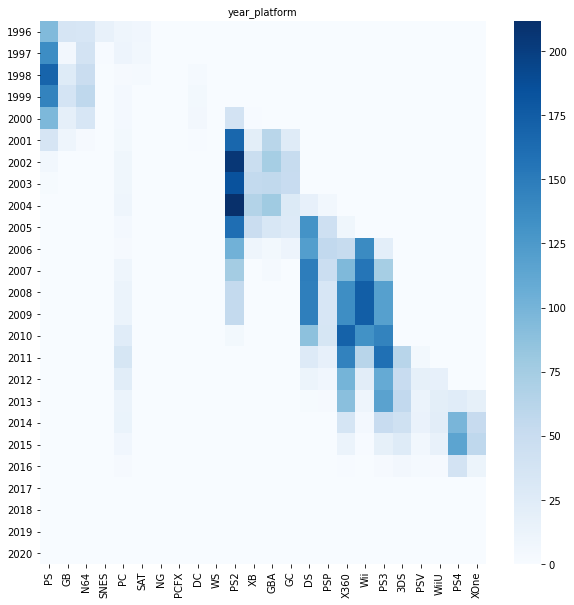

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(data = year_platform, cmap='Blues')
plt.title('year_platform', fontsize=10)
plt.show();

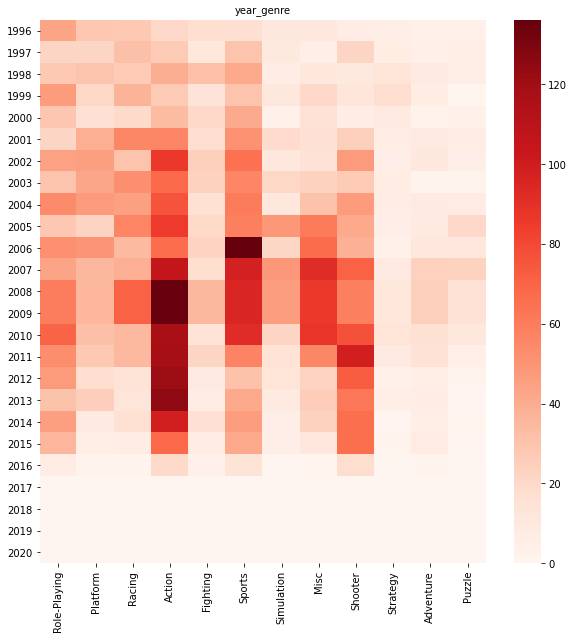

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(data = year_genre, cmap='Reds')
plt.title('year_genre', fontsize=10)
plt.show();

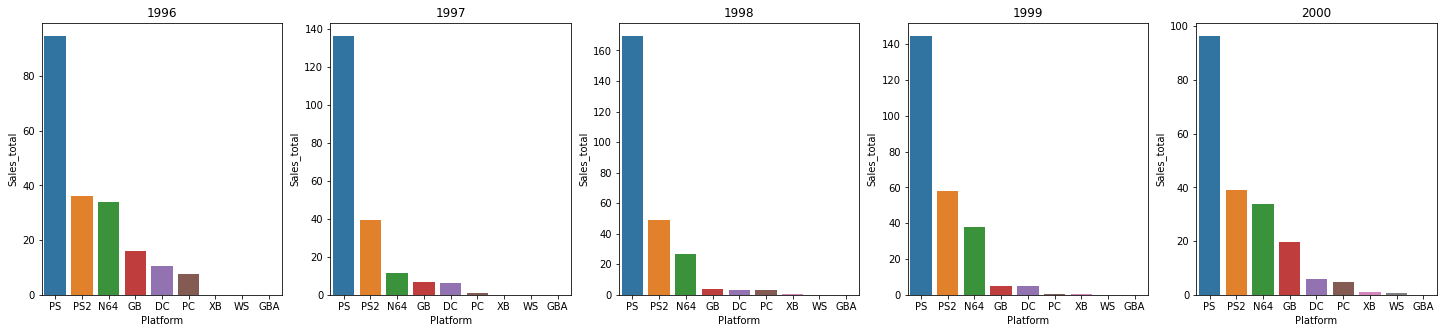

In [32]:
fig, axes = plt.subplots(1, 5, sharex=True, figsize=(25,5))

sns.barplot(ax = axes[0], x = "Platform", y = "Sales_total", data = platform_1996)
sns.barplot(ax = axes[1], x = "Platform", y = "Sales_total", data = platform_1997)
sns.barplot(ax = axes[2], x = "Platform", y = "Sales_total", data = platform_1998)
sns.barplot(ax = axes[3], x = "Platform", y = "Sales_total", data = platform_1999)
sns.barplot(ax = axes[4], x = "Platform", y = "Sales_total", data = platform_2000)

axes[0].set_title("1996")
axes[1].set_title("1997")
axes[2].set_title("1998")
axes[3].set_title("1999")
axes[4].set_title("2000");

# 1996, 상위 3개 플랫폼, PS DC GB
# 1997, 상위 3개 플랫폼, N64 GB GBA
# 1998, 상위 3개 플랫폼, PC GBA GB
# 1998, 상위 3개 플랫폼, PC GBA GB
# 2000, 상위 3개 플랫폼, PS PS2 N64

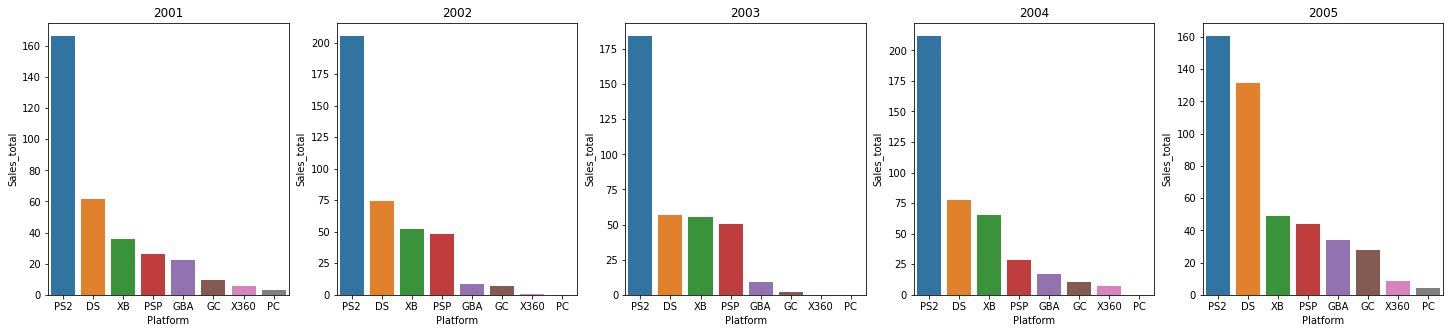

In [33]:
fig, axes = plt.subplots(1, 5, sharex=True, figsize=(25,5))

sns.barplot(ax = axes[0], x = "Platform", y = "Sales_total", data = platform_2001)
sns.barplot(ax = axes[1], x = "Platform", y = "Sales_total", data = platform_2002)
sns.barplot(ax = axes[2], x = "Platform", y = "Sales_total", data = platform_2003)
sns.barplot(ax = axes[3], x = "Platform", y = "Sales_total", data = platform_2004)
sns.barplot(ax = axes[4], x = "Platform", y = "Sales_total", data = platform_2005)
axes[0].set_title("2001")
axes[1].set_title("2002")
axes[2].set_title("2003")
axes[3].set_title("2004")
axes[4].set_title("2005");




**1996년부터 2004년까지는 PS2 플랫폼 게임의 판매량이 상대적으로 매우 높았다.**

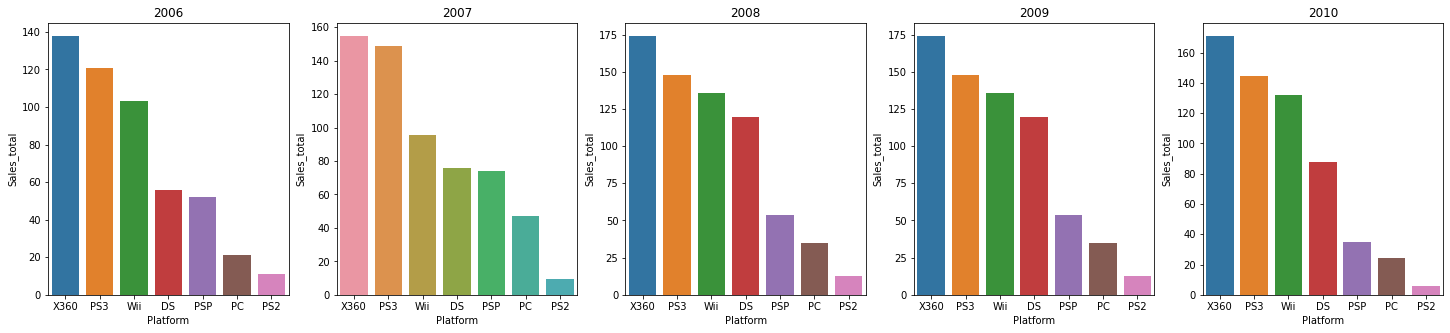

In [34]:
fig, axes = plt.subplots(1, 5, sharex=True, figsize=(25,5))

sns.barplot(ax = axes[0], x = "Platform", y = "Sales_total", data = platform_2006)
sns.barplot(ax = axes[1], x = "Platform", y = "Sales_total", data = platform_2007)
sns.barplot(ax = axes[2], x = "Platform", y = "Sales_total", data = platform_2008)
sns.barplot(ax = axes[3], x = "Platform", y = "Sales_total", data = platform_2009)
sns.barplot(ax = axes[4], x = "Platform", y = "Sales_total", data = platform_2010)
axes[0].set_title("2006")
axes[1].set_title("2007")
axes[2].set_title("2008")
axes[3].set_title("2009")
axes[4].set_title("2010");

**2006년부터 XBOX360의 판매량이 PS플랫폼을 제치고 가장 높은 판매량을 기록했다.**


**또한 닌텐도Wii, 닌텐도DS 플랫폼의 판매량 역시 점점 높은 비율을 차지함을 볼 수 있다.** 

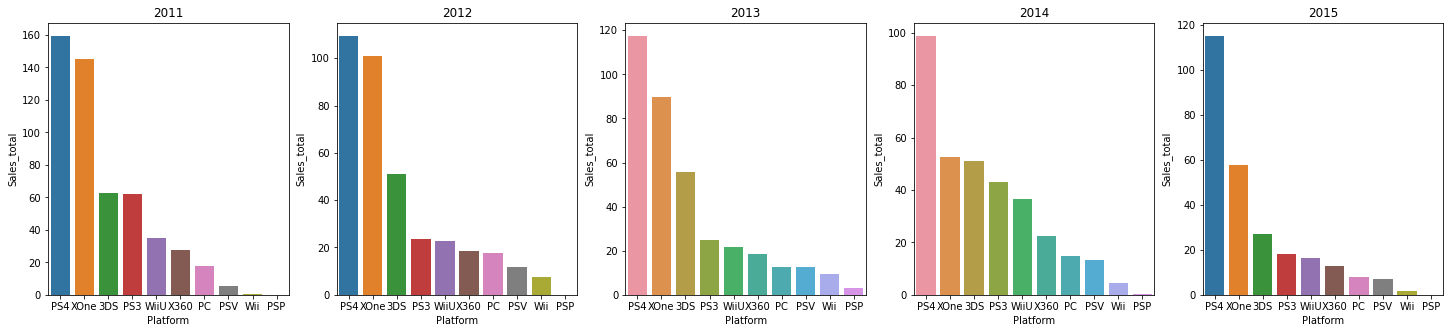

In [35]:
fig, axes = plt.subplots(1, 5, sharex=True, figsize=(25,5))

sns.barplot(ax = axes[0], x = "Platform", y = "Sales_total", data = platform_2011)
sns.barplot(ax = axes[1], x = "Platform", y = "Sales_total", data = platform_2012)
sns.barplot(ax = axes[2], x = "Platform", y = "Sales_total", data = platform_2013)
sns.barplot(ax = axes[3], x = "Platform", y = "Sales_total", data = platform_2014)
sns.barplot(ax = axes[4], x = "Platform", y = "Sales_total", data = platform_2015)
axes[0].set_title("2011")
axes[1].set_title("2012")
axes[2].set_title("2013")
axes[3].set_title("2014")
axes[4].set_title("2015");

**2011년도 부터 PS4 플랫폼 기반의 게임 판매량이 

**

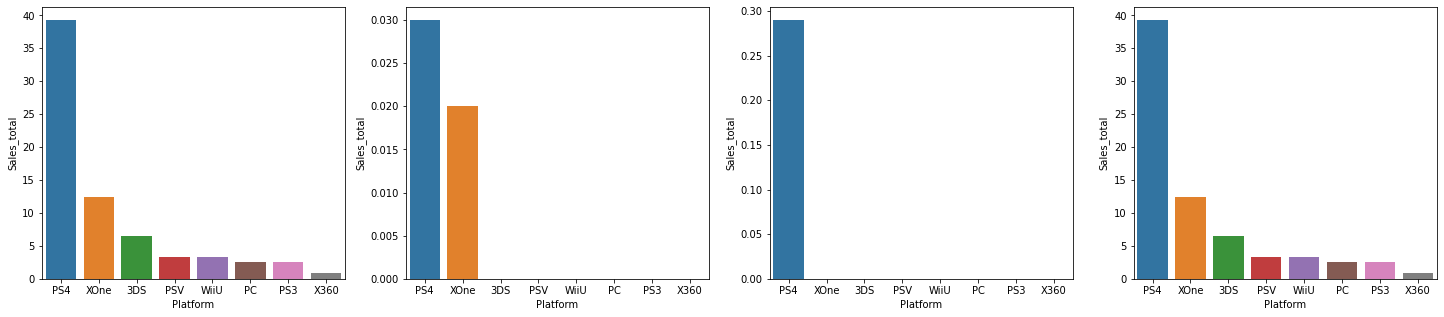

In [36]:
fig, axes = plt.subplots(1, 4, sharex=True, figsize=(25,5))

sns.barplot(ax = axes[0], x = "Platform", y = "Sales_total", data = platform_2016)
sns.barplot(ax = axes[1], x = "Platform", y = "Sales_total", data = platform_2017)
#sns.barplot(ax = axes[2], x = "Platform", y = "Sales_total", data = platform_2018)
#sns.barplot(ax = axes[3], x = "Platform", y = "Sales_total", data = platform_2019)
sns.barplot(ax = axes[2], x = "Platform", y = "Sales_total", data = platform_2020)
#axes[0].set_title("2016")
#axes[1].set_title("2017")
#axes[2].set_title("2018")
#axes[3].set_title("2019")
#axes[4].set_title("2020");
sns.barplot(ax = axes[3], x = "Platform", y = "Sales_total", data = platform_2016);

# 중복된 2016 시각화 코드는 16,17,20의 데이터만을 이용했을 때 발생하는 오류(?)를 해결하기 위해 추가했다.
# 왜 그런 오류가 발생하는지 알아봐야한다.

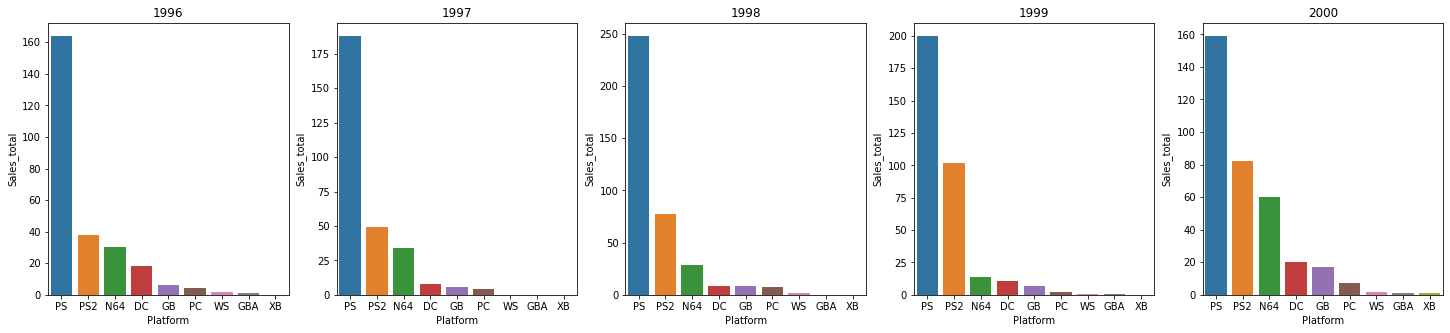

In [37]:
fig, axes = plt.subplots(1, 5, sharex=True, figsize=(25,5))

sns.barplot(ax = axes[0], x = "Platform", y = "Sales_total", data = platform_popular_1996)
sns.barplot(ax = axes[1], x = "Platform", y = "Sales_total", data = platform_popular_1997)
sns.barplot(ax = axes[2], x = "Platform", y = "Sales_total", data = platform_popular_1998)
sns.barplot(ax = axes[3], x = "Platform", y = "Sales_total", data = platform_popular_1999)
sns.barplot(ax = axes[4], x = "Platform", y = "Sales_total", data = platform_popular_2000)
axes[0].set_title("1996")
axes[1].set_title("1997")
axes[2].set_title("1998")
axes[3].set_title("1999")
axes[4].set_title("2000");

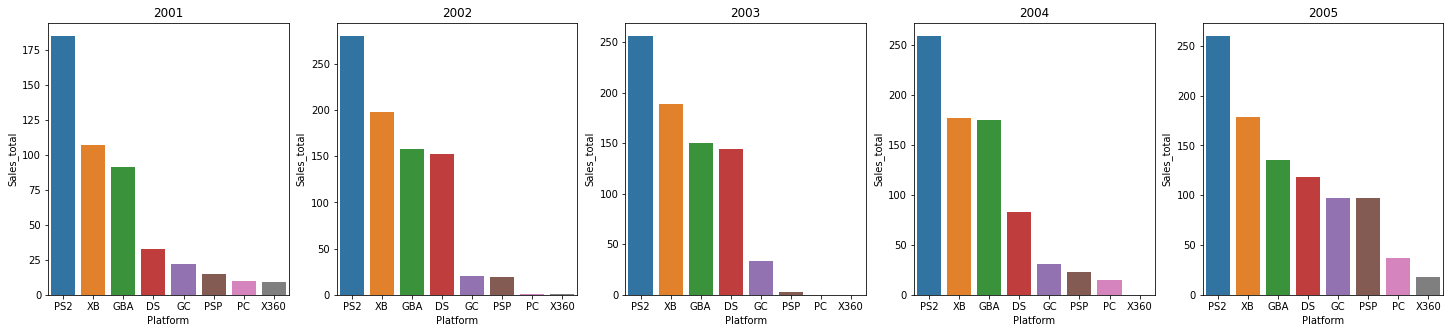

In [38]:
fig, axes = plt.subplots(1, 5, sharex=True, figsize=(25,5))

sns.barplot(ax = axes[0], x = "Platform", y = "Sales_total", data = platform_popular_2001)
sns.barplot(ax = axes[1], x = "Platform", y = "Sales_total", data = platform_popular_2002)
sns.barplot(ax = axes[2], x = "Platform", y = "Sales_total", data = platform_popular_2003)
sns.barplot(ax = axes[3], x = "Platform", y = "Sales_total", data = platform_popular_2004)
sns.barplot(ax = axes[4], x = "Platform", y = "Sales_total", data = platform_popular_2005)
axes[0].set_title("2001")
axes[1].set_title("2002")
axes[2].set_title("2003")
axes[3].set_title("2004")
axes[4].set_title("2005");

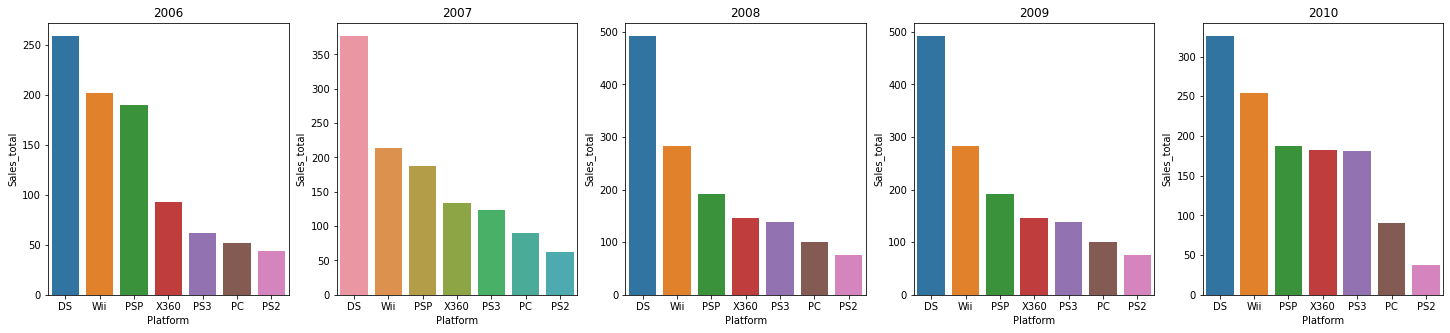

In [39]:
fig, axes = plt.subplots(1, 5, sharex=True, figsize=(25,5))

sns.barplot(ax = axes[0], x = "Platform", y = "Sales_total", data = platform_popular_2006)
sns.barplot(ax = axes[1], x = "Platform", y = "Sales_total", data = platform_popular_2007)
sns.barplot(ax = axes[2], x = "Platform", y = "Sales_total", data = platform_popular_2008)
sns.barplot(ax = axes[3], x = "Platform", y = "Sales_total", data = platform_popular_2009)
sns.barplot(ax = axes[4], x = "Platform", y = "Sales_total", data = platform_popular_2010)
axes[0].set_title("2006")
axes[1].set_title("2007")
axes[2].set_title("2008")
axes[3].set_title("2009")
axes[4].set_title("2010");


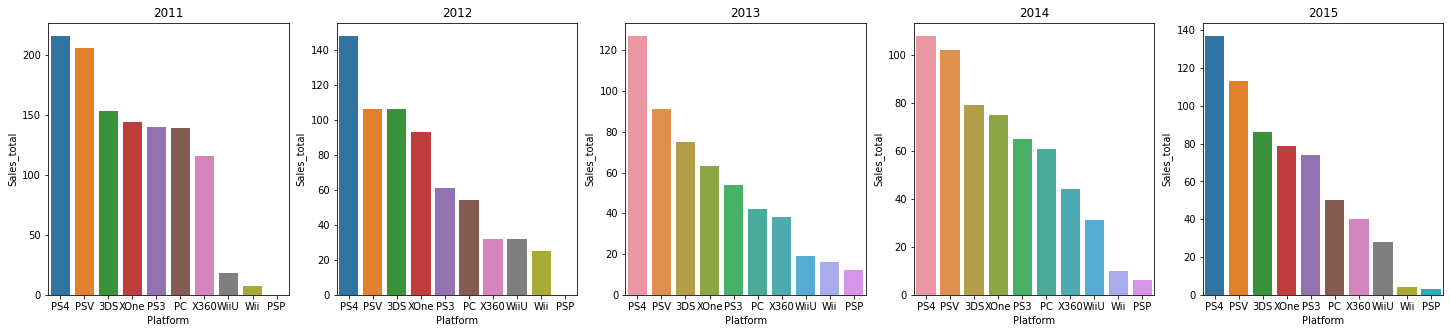

In [40]:
fig, axes = plt.subplots(1, 5, sharex=True, figsize=(25,5))

sns.barplot(ax = axes[0], x = "Platform", y = "Sales_total", data = platform_popular_2011)
sns.barplot(ax = axes[1], x = "Platform", y = "Sales_total", data = platform_popular_2012)
sns.barplot(ax = axes[2], x = "Platform", y = "Sales_total", data = platform_popular_2013)
sns.barplot(ax = axes[3], x = "Platform", y = "Sales_total", data = platform_popular_2014)
sns.barplot(ax = axes[4], x = "Platform", y = "Sales_total", data = platform_popular_2015)
axes[0].set_title("2011")
axes[1].set_title("2012")
axes[2].set_title("2013")
axes[3].set_title("2014")
axes[4].set_title("2015");


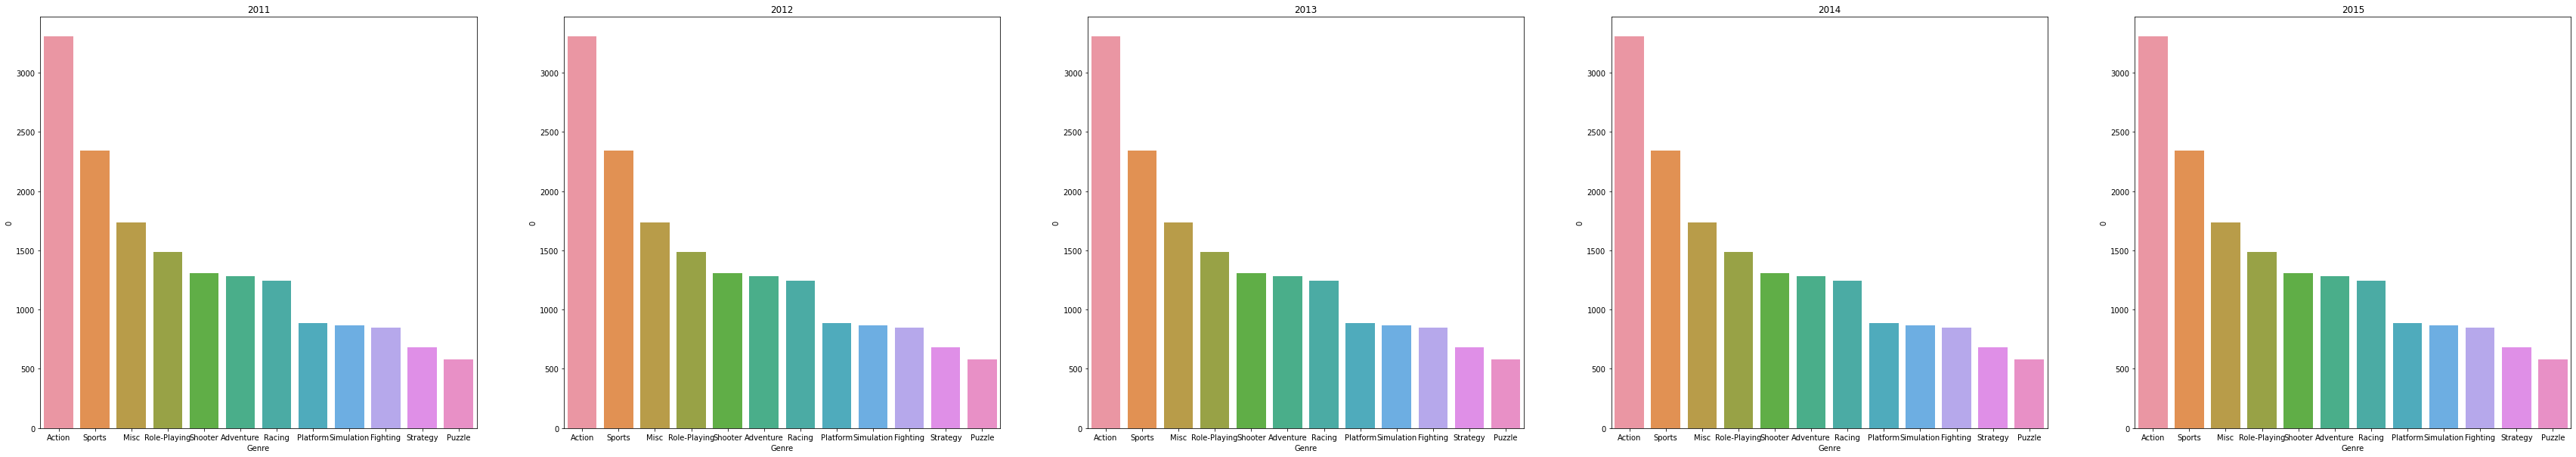

In [41]:
fig, axes = plt.subplots(1, 5, sharex=True, figsize=(60,10))

sns.barplot(ax = axes[0], x = "Genre", y = 0, data = genre_popular_2011)
sns.barplot(ax = axes[1], x = "Genre", y = 0, data = genre_popular_2012)
sns.barplot(ax = axes[2], x = "Genre", y = 0, data = genre_popular_2013)
sns.barplot(ax = axes[3], x = "Genre", y = 0, data = genre_popular_2014)
sns.barplot(ax = axes[4], x = "Genre", y = 0, data = genre_popular_2015)
axes[0].set_title("2011")
axes[1].set_title("2012")
axes[2].set_title("2013")
axes[3].set_title("2014")
axes[4].set_title("2015");

In [42]:
######연도별 게임의 트렌드
# 해당연도에 어떤 플랫폼 기반, 장르의 게임들이 많이 출시되었는가.
# pd.concat([platform_popular_1996.head(3), platform_popular_1997.head(3), platform_popular_1998.head(3), platform_popular_1999.head(3), platform_popular_2000.head(3),
#            platform_popular_2001.head(3), platform_popular_2002.head(3), platform_popular_2003.head(3), platform_popular_2004.head(3), platform_popular_2005.head(3),
#            platform_popular_2006.head(3), platform_popular_2007.head(3), platform_popular_2008.head(3), platform_popular_2009.head(3), platform_popular_2010.head(3),
#            platform_popular_2011.head(3), platform_popular_2012.head(3), platform_popular_2013.head(3), platform_popular_2014.head(3), platform_popular_2015.head(3),
#            platform_popular_2016.head(3), platform_popular_2017.head(3), platform_popular_2018.head(3), platform_popular_2019.head(3), platform_popular_2020.head(3)], axis = 1)
# pd.concat([platform_popular_1996['Platform'].head(3), platform_popular_1997['Platform'].head(3)], axis=0)
T_1996 = pd.DataFrame(platform_popular_1996['Platform'].head(3)).T
T_1996.columns = [0, 1, 2]
T_1996.index = ['1996']
T_1996

,0,1,2
1996,PS,SAT,SNES


**3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

In [43]:
df_ranking = df.sort_values(by='Sales_total' ,ascending=False)
df_100 = df_ranking.head(100)
df_50 = df_ranking.head(50)
df_30 = df_ranking.head(30)
df_10 = df_ranking.head(10)
df_100

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_total
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
1098,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.57
7494,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
12850,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.44
10937,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.38


In [44]:
df_100_genre = pd.DataFrame(df_100['Sales_total'].groupby(df_100['Genre']).size()).sort_values(by='Sales_total' ,ascending=False)
df_50_genre = pd.DataFrame(df_50['Sales_total'].groupby(df_50['Genre']).size()).sort_values(by='Sales_total' ,ascending=False)
df_30_genre = pd.DataFrame(df_30['Sales_total'].groupby(df_30['Genre']).size()).sort_values(by='Sales_total' ,ascending=False)
df_10_genre = pd.DataFrame(df_10['Sales_total'].groupby(df_10['Genre']).size()).sort_values(by='Sales_total' ,ascending=False)

In [45]:
df_100_platform = pd.DataFrame(df_100['Sales_total'].groupby(df_100['Platform']).size()).sort_values(by='Sales_total' ,ascending=False)
df_50_platform = pd.DataFrame(df_50['Sales_total'].groupby(df_50['Platform']).size()).sort_values(by='Sales_total' ,ascending=False)
df_30_platform = pd.DataFrame(df_30['Sales_total'].groupby(df_30['Platform']).size()).sort_values(by='Sales_total' ,ascending=False)
df_10_platform = pd.DataFrame(df_10['Sales_total'].groupby(df_10['Platform']).size()).sort_values(by='Sales_total' ,ascending=False)

In [46]:
df_100_genre = df_100_genre.reset_index()
df_100_genre.rename(columns={'Sales_total':'num'}, inplace=True)
df_50_genre = df_50_genre.reset_index()
df_50_genre.rename(columns={'Sales_total':'num'}, inplace=True)
df_30_genre = df_30_genre.reset_index()
df_30_genre.rename(columns={'Sales_total':'num'}, inplace=True)
df_10_genre = df_10_genre.reset_index()
df_10_genre.rename(columns={'Sales_total':'num'}, inplace=True)

df_100_platform = df_100_platform.reset_index()
df_100_platform.rename(columns={'Sales_total':'num'}, inplace=True)
df_50_platform = df_50_platform.reset_index()
df_50_platform.rename(columns={'Sales_total':'num'}, inplace=True)
df_30_platform = df_30_platform.reset_index()
df_30_platform.rename(columns={'Sales_total':'num'}, inplace=True)
df_10_platform = df_10_platform.reset_index()
df_10_platform.rename(columns={'Sales_total':'num'}, inplace=True)


In [ ]:
fig, axes = plt.subplots(1, 4, sharex=True, figsize=(25,5))

sns.barplot(ax = axes[0], x = "Genre", y = "num" , data = df_100_genre)
sns.barplot(ax = axes[1], x = "Genre", y = "num" , data = df_50_genre)
sns.barplot(ax = axes[2], x = "Genre", y = "num" , data = df_30_genre)
sns.barplot(ax = axes[3], x = "Genre", y = "num" , data = df_10_genre);
axes[0].set_title("Top 100")
axes[1].set_title("Top 50")
axes[2].set_title("Top 30")
axes[3].set_title("Top 10");

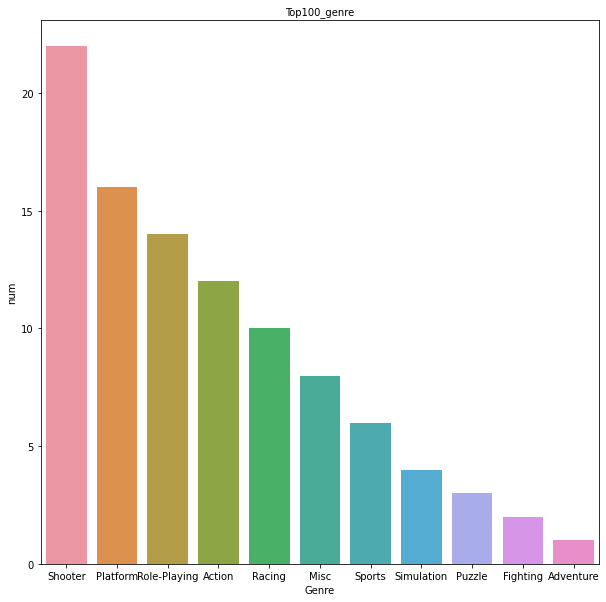

In [56]:
plt.figure(figsize=(10,10))
sns.barplot(x = "Genre", y = "num" , data = df_100_genre)
plt.title('Top100_genre', fontsize=10)
plt.show();

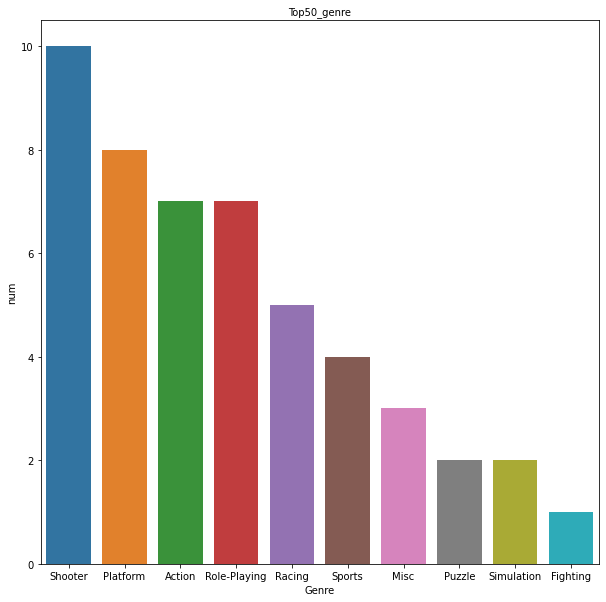

In [57]:
plt.figure(figsize=(10,10))
sns.barplot(x = "Genre", y = "num" , data = df_50_genre)
plt.title('Top50_genre', fontsize=10)
plt.show();

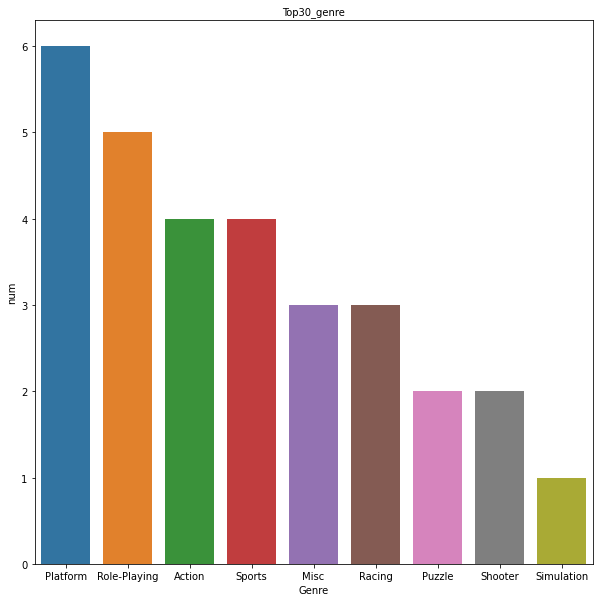

In [58]:
plt.figure(figsize=(10,10))
sns.barplot(x = "Genre", y = "num" , data = df_30_genre)
plt.title('Top30_genre', fontsize=10)
plt.show();

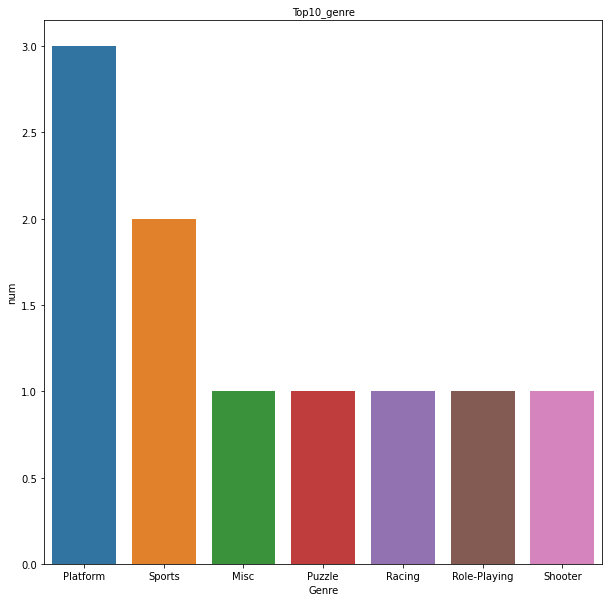

In [59]:
plt.figure(figsize=(10,10))
sns.barplot(x = "Genre", y = "num" , data = df_10_genre)
plt.title('Top10_genre', fontsize=10)
plt.show();

In [54]:
df_10_genre

,Genre,num
0,Platform,3
1,Sports,2
2,Misc,1
3,Puzzle,1
4,Racing,1
5,Role-Playing,1
6,Shooter,1


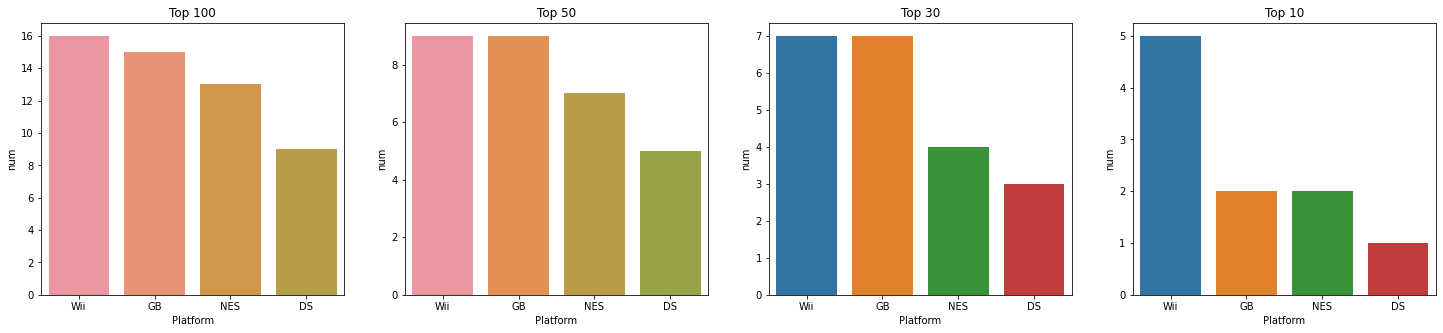

In [48]:
fig, axes = plt.subplots(1, 4, sharex=True, figsize=(25,5))

sns.barplot(ax = axes[0], x = "Platform", y = "num" , data = df_100_platform)
sns.barplot(ax = axes[1], x = "Platform", y = "num" , data = df_50_platform)
sns.barplot(ax = axes[2], x = "Platform", y = "num" , data = df_30_platform)
sns.barplot(ax = axes[3], x = "Platform", y = "num" , data = df_10_platform);
axes[0].set_title("Top 100")
axes[1].set_title("Top 50")
axes[2].set_title("Top 30")
axes[3].set_title("Top 10");

**판매량이 높은 순위부터 100위, 50위, 30위, 10위로 나눠 genre와 platform에 대한 데이터를 얻은 결과**


- Genre는 Platform, Sports, Misc, Puzzle, Racing, Role-playing, Shooter
- Platform은 Wii, GB, NES, DS 순으로 높은 비율을 나타낸다.





In [49]:
df_100_publisher = pd.DataFrame(df_100['Sales_total'].groupby(df_100['Publisher']).size()).sort_values(by='Sales_total' ,ascending=False)

In [50]:
genre_popular_1996 = genre_popular_1996.reset_index()
genre_popular_1996 = genre_popular_1996.drop(['index'], axis = 1)

In [51]:
genre_popular_1996.head(5)

,Genre,0
0,Action,3305
1,Sports,2341
2,Misc,1734
3,Role-Playing,1483
4,Shooter,1308


In [52]:
#df.info()
df_100_genre

,Genre,num
0,Shooter,22
1,Platform,16
2,Role-Playing,14
3,Action,12
4,Racing,10
5,Misc,8
6,Sports,6
7,Simulation,4
8,Puzzle,3
9,Fighting,2


**#1 데이터는 0000년도에 출시된 게임의 현재까지의 누적 판매량을 의미한다.**


**그러므로 데이터들을 그대로 이용하여 게임이 해당년도에 얼마나 팔렸는지, 어떤 장르가 유행했는지 보는 것은 오류가 있다고 생각한다.**

**#2 누적 판매량이므로 누적연도로 나눠 연평균 판매량을 구해 데이터를 비교해보는 것은 어떨까?**

**(예를들면 1996년 sales_total/(2021-1996) )**

**----> But, 누적판매량이 높다 = 한 순간의 폭발적인 인기일 수도 있지만, 꾸준한 판매량을 의미할 수도 있다.**

**그러므로 연평균 판매량을 구하거나, 어떤 연도에 발매가 되었는지를 보기보다는, 유행의 사이클이 있는지, 있다면 지금은 어떤 장르, 플랫폼 유행의 사이클 위에 있는지를 봐야한다.**

**근데 이 누적데이터를 가지고 연도별 유행을 알 수 있는가**

